In [1]:
## Necessary packages
import tensorflow as tf
from keras.models import load_model
import keras
from keras import backend as K
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import cv2

Using TensorFlow backend.


Verifying that GPU is available

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13659625681863239733
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6667611669
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3228139712907338075
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [3]:
# train_path = "C:/Users/Gray/Desktop/zzyproject/blood-cells/dataset2-master/dataset2-master/images/TRAIN/"
# test_path = "C:/Users/Gray/Desktop/zzyproject/blood-cells/dataset2-master/dataset2-master/images/TEST/"

In [2]:
train_path = "C:/Users/JT/Desktop/CU Boulder/DS Club/TRAIN/"
test_path = "C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/"

Reading in the image data

In [5]:
X_train = []
y_train = []
train_fnames = []

for wbctype in os.listdir(train_path):
    for file in os.listdir(os.path.join(train_path,wbctype)): #cycle through the different folders
        X_train.append(cv2.imread(train_path+wbctype+"/"+file)) #read in image file and store image
        y_train.append(wbctype)                                 #store WBC type
        train_fnames.append(train_path+wbctype+"/"+file)        #store file path
        
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
train_fnames = np.asarray(train_fnames)

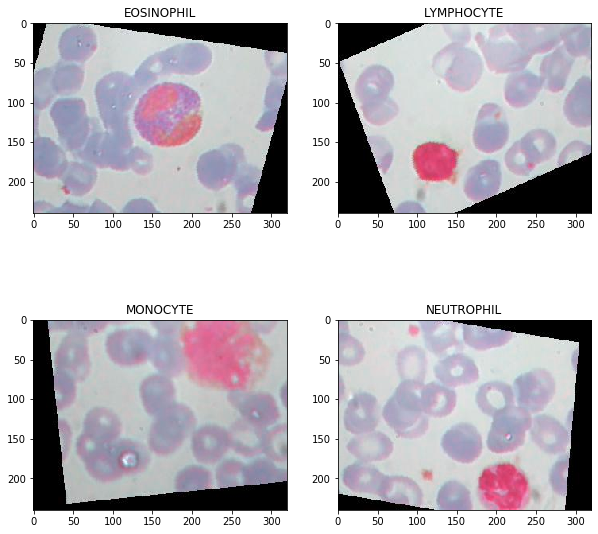

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

plt.subplot(221)
plt.title(y_train[0])
plt.imshow(X_train[0]); 

plt.subplot(222)
plt.title(y_train[3000])
plt.imshow(X_train[3000]); 

plt.subplot(223)
plt.title(y_train[5000])
plt.imshow(X_train[5000]); 

plt.subplot(224)
plt.title(y_train[8000])
plt.imshow(X_train[8000]); 

sample_images = X_train[[0,3000,5000,8000],:]
sample_labels = y_train[[0,3000,5000,8000]]

Normalizing the image data. There are several techniques that can be used, such as normalizing across each image or normalizing across the entire training dataset. I'm first going to explore normalization across the entire dataset.

In [3]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
#datagen.fit(X_train)

sample_batch = datagen.flow(sample_images, sample_labels, batch_size=4, shuffle=False)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i in np.arange(4):
    plt.subplot(220+(i+1))
    plt.title(sample_batch[0][1][i]) 
    plt.imshow((sample_batch[0][0][i]*255).astype(np.uint8))

NameError: name 'sample_images' is not defined

In [4]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
training_datagen = datagen.flow_from_directory(
    shuffle= True,
    batch_size= 32,
    target_size= (80,80), 
    directory= 'C:/Users/JT/Desktop/CU Boulder/DS Club/TRAIN'
)

# datagen.fit(X_train) #machinelearningmastery.com ImageDataGenerator for more info
# datagen.fit(processed_dataset)

Found 9957 images belonging to 4 classes.


Base Model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing import image

def model():
    model = Sequential()
    model.add(Conv2D(80, (3,3), strides = (1, 1), activation = 'relu', input_shape = (80, 80, 3)))
    model.add(MaxPool2D(pool_size = (3,3)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
#     model.add(Conv2D(32, 8, strides = (1,1), activation = 'relu'))
#     model.add(Conv2D(32, 8, strides = (1,1), activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())


    model.add(Dense(128, activation = 'relu'))
#     model.add(Dropout(0.25))
    model.add(Dense(64, activation = 'relu'))
#     model.add(Dropout(0.25))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
    
    return model


nn = model()
nn.fit_generator(training_datagen, steps_per_epoch = None, epochs = 30, verbose = 1)
nn.save('Model.h5')



Epoch 1/30
312/312 [==============================] - 13s 41ms/step - loss: 1.3044 - accuracy: 0.4060
Epoch 2/30
312/312 [==============================] - 11s 34ms/step - loss: 0.8425 - accuracy: 0.6362
Epoch 3/30
312/312 [==============================] - 11s 35ms/step - loss: 0.5577 - accuracy: 0.7676
Epoch 4/30
312/312 [==============================] - 11s 35ms/step - loss: 0.3347 - accuracy: 0.8643
Epoch 5/30
312/312 [==============================] - 10s 33ms/step - loss: 0.2121 - accuracy: 0.9179
Epoch 6/30
312/312 [==============================] - 10s 33ms/step - loss: 0.1535 - accuracy: 0.9461
Epoch 7/30
312/312 [==============================] - 10s 32ms/step - loss: 0.1094 - accuracy: 0.9641
Epoch 8/30
312/312 [==============================] - 10s 31ms/step - loss: 0.0556 - accuracy: 0.9817
Epoch 9/30
312/312 [==============================] - 10s 31ms/step - loss: 0.0365 - accuracy: 0.9895
Epoch 10/30
312/312 [==============================] - 10s 32ms/step - loss: 0.0

Model 1

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing import image

def model():
    model = Sequential()
    model.add(Conv2D(80, (3,3), strides = (1, 1), activation = 'relu', input_shape = (80, 80, 3)))
    model.add(MaxPool2D(pool_size = (3,3)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    
        
    
    #     model.add(Conv2D(32, 8, strides = (1,1), activation = 'relu'))
#     model.add(Conv2D(32, 8, strides = (1,1), activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Flatten())


    model.add(Dense(128, activation = 'relu'))
#     model.add(Dropout(0.25))
    model.add(Dense(64, activation = 'relu'))
#     model.add(Dropout(0.25))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
    
    return model


nn = model()
nn.fit_generator(training_datagen, steps_per_epoch = None, epochs = 30, verbose = 1)
nn.save('Model_1.h5')

Epoch 1/30
312/312 [==============================] - 10s 32ms/step - loss: 1.3025 - accuracy: 0.3806
Epoch 2/30
312/312 [==============================] - 10s 31ms/step - loss: 0.8980 - accuracy: 0.6107
Epoch 3/30
312/312 [==============================] - 10s 32ms/step - loss: 0.5451 - accuracy: 0.7755
Epoch 4/30
312/312 [==============================] - 10s 31ms/step - loss: 0.3441 - accuracy: 0.8564
Epoch 5/30
312/312 [==============================] - 10s 31ms/step - loss: 0.2537 - accuracy: 0.8974
Epoch 6/30
312/312 [==============================] - 10s 31ms/step - loss: 0.1876 - accuracy: 0.9245
Epoch 7/30
312/312 [==============================] - 10s 31ms/step - loss: 0.1418 - accuracy: 0.9461
Epoch 8/30
312/312 [==============================] - 11s 35ms/step - loss: 0.1069 - accuracy: 0.9591
Epoch 9/30
312/312 [==============================] - 11s 36ms/step - loss: 0.0830 - accuracy: 0.9708
Epoch 10/30
312/312 [==============================] - 11s 35ms/step - loss: 0.070

Model 2

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing import image

def model():
    model = Sequential()
    model.add(Conv2D(80, (3,3), strides = (1, 1), activation = 'relu', input_shape = (80, 80, 3)))
    model.add(MaxPool2D(pool_size = (3,3)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
     #     model.add(Conv2D(32, 8, strides = (1,1), activation = 'relu'))
#     model.add(Conv2D(32, 8, strides = (1,1), activation = 'relu'))
    model.add(Flatten())


    model.add(Dense(128, activation = 'relu'))
#     model.add(Dropout(0.25))
    model.add(Dense(64, activation = 'relu'))
#     model.add(Dropout(0.25))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
    
    return model


nn = model()
nn.fit_generator(training_datagen, steps_per_epoch = None, epochs = 30, verbose = 1)
nn.save('Model_2.h5')

Epoch 1/30
312/312 [==============================] - 10s 32ms/step - loss: 1.4236 - accuracy: 0.2655
Epoch 2/30
312/312 [==============================] - 10s 33ms/step - loss: 1.2677 - accuracy: 0.3898
Epoch 3/30
312/312 [==============================] - 10s 33ms/step - loss: 1.0458 - accuracy: 0.5140
Epoch 4/30
312/312 [==============================] - 10s 32ms/step - loss: 0.7428 - accuracy: 0.6871
Epoch 5/30
312/312 [==============================] - 10s 32ms/step - loss: 0.5174 - accuracy: 0.7779
Epoch 6/30
312/312 [==============================] - 10s 32ms/step - loss: 0.3914 - accuracy: 0.8398
Epoch 7/30
312/312 [==============================] - 10s 32ms/step - loss: 0.2949 - accuracy: 0.88380s - loss: 0.2951 - accuracy: 0.88
Epoch 8/30
312/312 [==============================] - 10s 32ms/step - loss: 0.2344 - accuracy: 0.9093
Epoch 9/30
312/312 [==============================] - 10s 33ms/step - loss: 0.1780 - accuracy: 0.9347
Epoch 10/30
312/312 [===========================

Model 3

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing import image

def model():
    model = Sequential()
    model.add(Conv2D(80, (3,3), strides = (1, 1), activation = 'relu', input_shape = (80, 80, 3)))
    model.add(MaxPool2D(pool_size = (3,3)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
     #     model.add(Conv2D(32, 8, strides = (1,1), activation = 'relu'))
#     model.add(Conv2D(32, 8, strides = (1,1), activation = 'relu'))
    model.add(Flatten())


    model.add(Dense(128, activation = 'relu'))
#     model.add(Dropout(0.25))
    model.add(Dropout(0.4))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
    
    return model


nn = model()
nn.fit_generator(training_datagen, steps_per_epoch = None, epochs = 30, verbose = 1)
nn.save('Model_3.h5')

Epoch 1/30
312/312 [==============================] - 10s 32ms/step - loss: 1.4498 - accuracy: 0.2473
Epoch 2/30
312/312 [==============================] - 10s 32ms/step - loss: 1.3865 - accuracy: 0.2473
Epoch 3/30
312/312 [==============================] - 10s 32ms/step - loss: 1.3876 - accuracy: 0.2407
Epoch 4/30
312/312 [==============================] - 10s 32ms/step - loss: 1.3599 - accuracy: 0.3097
Epoch 5/30
312/312 [==============================] - 10s 33ms/step - loss: 1.2549 - accuracy: 0.4087
Epoch 6/30
312/312 [==============================] - 10s 32ms/step - loss: 1.1409 - accuracy: 0.4778
Epoch 7/30
312/312 [==============================] - 10s 32ms/step - loss: 0.9342 - accuracy: 0.5794
Epoch 8/30
312/312 [==============================] - 10s 32ms/step - loss: 0.7786 - accuracy: 0.6531
Epoch 9/30
312/312 [==============================] - 10s 32ms/step - loss: 0.6259 - accuracy: 0.73160s - loss: 0.6287 
Epoch 10/30
312/312 [==============================] - 10s 32ms/

Model 4

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing import image

def model():
    model = Sequential()
    model.add(Conv2D(80, (3,3), strides = (1, 1), activation = 'relu', input_shape = (80, 80, 3)))
    model.add(MaxPool2D(pool_size = (3,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
    
    return model


nn = model()
nn.fit_generator(training_datagen, steps_per_epoch = None, epochs = 20, verbose = 1)
nn.save('Model_4.h5')

Epoch 1/20
312/312 [==============================] - 10s 32ms/step - loss: 1.0952 - accuracy: 0.4967
Epoch 2/20
312/312 [==============================] - 10s 33ms/step - loss: 0.5667 - accuracy: 0.7642
Epoch 3/20
312/312 [==============================] - 10s 32ms/step - loss: 0.3302 - accuracy: 0.8664
Epoch 4/20
312/312 [==============================] - 10s 32ms/step - loss: 0.2176 - accuracy: 0.9151
Epoch 5/20
312/312 [==============================] - 10s 33ms/step - loss: 0.1567 - accuracy: 0.9407
Epoch 6/20
312/312 [==============================] - 10s 32ms/step - loss: 0.1286 - accuracy: 0.9520
Epoch 7/20
312/312 [==============================] - 10s 32ms/step - loss: 0.0968 - accuracy: 0.9661
Epoch 8/20
312/312 [==============================] - 10s 33ms/step - loss: 0.0780 - accuracy: 0.9715
Epoch 9/20
312/312 [==============================] - 10s 32ms/step - loss: 0.0637 - accuracy: 0.9774
Epoch 10/20
312/312 [==============================] - 10s 32ms/step - loss: 0.056

Image data generator for full sized images

Model 8

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing import image

def model():
    model = Sequential()
    model.add(Conv2D(80, (3,3), strides = (1, 1), activation = 'relu', input_shape = (80, 80, 3)))
    model.add(MaxPool2D(pool_size = (3,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
    
    return model


nn = model()
nn.fit_generator(training_datagen, steps_per_epoch = None, epochs = 20, verbose = 1)
nn.save('Model_8.h5')

Epoch 1/20
312/312 [==============================] - 11s 35ms/step - loss: 1.1304 - accuracy: 0.5001
Epoch 2/20
312/312 [==============================] - 11s 34ms/step - loss: 0.5159 - accuracy: 0.7950
Epoch 3/20
312/312 [==============================] - 11s 34ms/step - loss: 0.3086 - accuracy: 0.8798
Epoch 4/20
312/312 [==============================] - 10s 34ms/step - loss: 0.2110 - accuracy: 0.9176
Epoch 5/20
312/312 [==============================] - 11s 34ms/step - loss: 0.1380 - accuracy: 0.9462
Epoch 6/20
312/312 [==============================] - 11s 34ms/step - loss: 0.1071 - accuracy: 0.9618
Epoch 7/20
312/312 [==============================] - 10s 34ms/step - loss: 0.0819 - accuracy: 0.9705
Epoch 8/20
312/312 [==============================] - 11s 35ms/step - loss: 0.0590 - accuracy: 0.9787
Epoch 9/20
312/312 [==============================] - 11s 35ms/step - loss: 0.0558 - accuracy: 0.98000s - loss: 0.0558 - accuracy: 0.98
Epoch 10/20
312/312 [===========================

In [3]:
datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
training_datagen2 = datagen.flow_from_directory(
    shuffle= True,
    batch_size= 32,
    target_size= (240,320), 
    directory= 'C:/Users/JT/Desktop/CU Boulder/DS Club/TRAIN'
)

# datagen.fit(X_train) #machinelearningmastery.com ImageDataGenerator for more info
# datagen.fit(processed_dataset)

Found 9957 images belonging to 4 classes.


Model 5

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

def model():
    model = Sequential()
    model.add(Conv2D(80, (3,3), strides = (1, 1), activation = 'relu', input_shape = (240, 320, 3)))
    model.add(MaxPool2D(pool_size = (3,3)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Flatten())


    model.add(Dense(128, activation = 'relu'))
#     model.add(Dropout(0.25))
    model.add(Dense(64, activation = 'relu'))
#     model.add(Dropout(0.25))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
    
    return model


callback = ModelCheckpoint(test_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [callback]


nn = model()
nn.fit_generator(training_datagen2, steps_per_epoch = None, epochs = 20, verbose = 1, callbacks=callbacks_list)
nn.save('Model_5.h5')

Epoch 1/20
312/312 [==============================] - 54s 174ms/step - loss: 2.5783 - accuracy: 0.4054
Epoch 2/20
  1/312 [..............................] - ETA: 54s - loss: 1.0983 - accuracy: 0.6250

C:\Users\JT\Anaconda3\envs\deeplearning\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


312/312 [==============================] - 53s 171ms/step - loss: 0.9255 - accuracy: 0.6229
Epoch 3/20
312/312 [==============================] - 53s 171ms/step - loss: 0.6124 - accuracy: 0.7648
Epoch 4/20
312/312 [==============================] - 53s 171ms/step - loss: 0.3135 - accuracy: 0.8861
Epoch 5/20
312/312 [==============================] - 53s 171ms/step - loss: 0.1469 - accuracy: 0.9498
Epoch 6/20
312/312 [==============================] - 53s 171ms/step - loss: 0.0883 - accuracy: 0.9755
Epoch 7/20
312/312 [==============================] - 53s 171ms/step - loss: 0.0453 - accuracy: 0.9891
Epoch 8/20
312/312 [==============================] - 53s 171ms/step - loss: 0.0203 - accuracy: 0.9937
Epoch 9/20
312/312 [==============================] - 53s 171ms/step - loss: 0.0887 - accuracy: 0.9823
Epoch 10/20
312/312 [==============================] - 53s 171ms/step - loss: 0.0130 - accuracy: 0.9962
Epoch 11/20
312/312 [==============================] - 54s 172ms/step - loss: 0.059

Model 6

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

def model():
    model = Sequential()
    model.add(Conv2D(80, (3,3), strides = (1, 1), activation = 'relu', input_shape = (240, 320, 3)))
    model.add(MaxPool2D(pool_size = (3,3)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
#     model.add(Conv2D(32, 8, strides = (1,1), activation = 'relu'))
#     model.add(Conv2D(32, 8, strides = (1,1), activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Flatten())


    model.add(Dense(128, activation = 'relu'))
#     model.add(Dropout(0.25))
    model.add(Dense(64, activation = 'relu'))
#     model.add(Dropout(0.25))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
    
    return model

callback = ModelCheckpoint(test_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [callback]


nn = model()
nn.fit_generator(training_datagen2, steps_per_epoch = None, epochs = 20, verbose = 1, callbacks=callbacks_list)
nn.save('Model_6.h5')

Epoch 1/20
312/312 [==============================] - 53s 171ms/step - loss: 2.3420 - accuracy: 0.4326
Epoch 2/20
  1/312 [..............................] - ETA: 53s - loss: 0.9498 - accuracy: 0.5938

C:\Users\JT\Anaconda3\envs\deeplearning\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


312/312 [==============================] - 53s 169ms/step - loss: 0.8738 - accuracy: 0.6422
Epoch 3/20
312/312 [==============================] - 53s 169ms/step - loss: 0.5359 - accuracy: 0.7867
Epoch 4/20
312/312 [==============================] - 53s 169ms/step - loss: 0.2569 - accuracy: 0.9116
Epoch 5/20
312/312 [==============================] - 53s 170ms/step - loss: 0.1031 - accuracy: 0.9667
Epoch 6/20
312/312 [==============================] - 54s 175ms/step - loss: 0.0701 - accuracy: 0.9804
Epoch 7/20
312/312 [==============================] - 52s 168ms/step - loss: 0.0275 - accuracy: 0.9915
Epoch 8/20
312/312 [==============================] - 52s 168ms/step - loss: 0.0284 - accuracy: 0.9917
Epoch 9/20
312/312 [==============================] - 55s 175ms/step - loss: 0.0122 - accuracy: 0.9972
Epoch 10/20
312/312 [==============================] - 54s 173ms/step - loss: 0.0707 - accuracy: 0.9877
Epoch 11/20
312/312 [==============================] - 52s 168ms/step - loss: 0.007

Model 7

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

def model():
    model = Sequential()
    model.add(Conv2D(128, (3,3), strides = (1, 1), activation = 'relu', input_shape = (240, 320, 3)))
    model.add(MaxPool2D(pool_size = (3,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))

    model.add(Dropout(0.25))
    model.add(Flatten())
    
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])
    
    return model



callback = ModelCheckpoint(test_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [callback]


nn = model()
nn.fit_generator(training_datagen2, steps_per_epoch = None, epochs = 15, verbose = 1, callbacks=callbacks_list)
nn.save('Model_7.h5')

Epoch 1/15
312/312 [==============================] - 48s 154ms/step - loss: 1.1964 - accuracy: 0.5004
Epoch 2/15
  1/312 [..............................] - ETA: 46s - loss: 0.6181 - accuracy: 0.7188

C:\Users\JT\Anaconda3\envs\deeplearning\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


312/312 [==============================] - 50s 160ms/step - loss: 0.4755 - accuracy: 0.8141
Epoch 3/15
312/312 [==============================] - 52s 166ms/step - loss: 0.2236 - accuracy: 0.9148
Epoch 4/15
312/312 [==============================] - 49s 156ms/step - loss: 0.1498 - accuracy: 0.9495
Epoch 5/15
312/312 [==============================] - 51s 164ms/step - loss: 0.0828 - accuracy: 0.9714
Epoch 6/15
312/312 [==============================] - 51s 163ms/step - loss: 0.0475 - accuracy: 0.9837
Epoch 7/15
312/312 [==============================] - 49s 158ms/step - loss: 0.0390 - accuracy: 0.9888
Epoch 8/15
312/312 [==============================] - 47s 151ms/step - loss: 0.0278 - accuracy: 0.9926
Epoch 9/15
312/312 [==============================] - 48s 154ms/step - loss: 0.0164 - accuracy: 0.9955
Epoch 10/15
312/312 [==============================] - 52s 167ms/step - loss: 0.0198 - accuracy: 0.9947
Epoch 11/15
312/312 [==============================] - 50s 162ms/step - loss: 0.012

Model 9

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPool2D, Flatten, BatchNormalization
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

def model():
    model = Sequential()
    model.add(Conv2D(128, (3,3), strides = (1, 1), activation = 'relu', input_shape = (240, 320, 3)))
    model.add(MaxPool2D(pool_size = (3,3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), strides = (1,1), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2)))
    
    model.add(Dropout(0.4))
    model.add(Flatten())
    
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(4, activation = 'softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model



callback = ModelCheckpoint(test_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [callback]


nn = model()
nn.fit_generator(training_datagen2, steps_per_epoch = None, epochs = 20, verbose = 1, callbacks=callbacks_list)
nn.save('Model_9.h5')

Epoch 1/20
312/312 [==============================] - 53s 169ms/step - loss: 1.5400 - accuracy: 0.3036
Epoch 2/20
  1/312 [..............................] - ETA: 49s - loss: 1.1596 - accuracy: 0.4375

C:\Users\JT\Anaconda3\envs\deeplearning\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_accuracy available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


312/312 [==============================] - 49s 157ms/step - loss: 1.1592 - accuracy: 0.4626
Epoch 3/20
312/312 [==============================] - 49s 156ms/step - loss: 0.8182 - accuracy: 0.6588
Epoch 4/20
312/312 [==============================] - 49s 156ms/step - loss: 0.5119 - accuracy: 0.7934
Epoch 5/20
312/312 [==============================] - 49s 156ms/step - loss: 0.2912 - accuracy: 0.8827
Epoch 6/20
312/312 [==============================] - 49s 156ms/step - loss: 0.1916 - accuracy: 0.9265
Epoch 7/20
312/312 [==============================] - 49s 156ms/step - loss: 0.1442 - accuracy: 0.9450
Epoch 8/20
312/312 [==============================] - 49s 156ms/step - loss: 0.1107 - accuracy: 0.9595
Epoch 9/20
312/312 [==============================] - 49s 156ms/step - loss: 0.1039 - accuracy: 0.9624
Epoch 10/20
312/312 [==============================] - 49s 156ms/step - loss: 0.0792 - accuracy: 0.9721
Epoch 11/20
312/312 [==============================] - 49s 156ms/step - loss: 0.077

In [16]:
import numpy
import os
from PIL import Image



def acc(path, model):
   
    model = load_model(model)

    correct = 0
    wrong = 0
    total = 0

    cell_type = path.split('/')[-1]
    
    tag = -1
    if cell_type == 'EOSINOPHIL':
        tag = 0
    elif cell_type == 'LYMPHOCYTE':
        tag = 1
    elif cell_type == 'MONOCYTE':
        tag = 2
    elif cell_type == 'NEUTROPHIL':
        tag = 3
    
    if tag == -1:
        exit(0)
    
    for file in os.listdir(path):
        new_image = Image.open(path + '/'+file)
        new_image = new_image.resize((80, 80))
        new_image = numpy.array(new_image, dtype = 'float32')
        new_image/=255
        new_image = new_image.reshape(1, 80, 80, 3)
        prediction = model.predict(new_image)
        #print(numpy.argmax(prediction))
        if numpy.argmax(prediction) == tag: correct+=1
        else: wrong+=1
        total+=1
        
    if cell_type == 'EOSINOPHIL':
        print('EOSINOPHIL :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    elif cell_type == 'LYMPHOCYTE':
        print('LYMPHOCYTE :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    elif cell_type == 'MONOCYTE':
        print('MONOCYTE :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    elif cell_type == 'NEUTROPHIL':
        print('NEUTROPHIL ::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    else:
        print("ERRoR:???")


In [11]:
test_1 = 'C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/EOSINOPHIL'
test_2 = 'C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/LYMPHOCYTE'
test_3 = 'C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/MONOCYTE'
test_4 = 'C:/Users/JT/Desktop/CU Boulder/DS Club/TEST/NEUTROPHIL'

Base Model Test Results

In [11]:
acc(test_1, 'Model.h5_1')
acc(test_2, 'Model.h5_1')
acc(test_3, 'Model.h5_1')
acc(test_4, 'Model.h5_1')

EOSINOPHIL :::: Result :  Correct prediction %:  86.03531300160515 Wrong prediction : % 13.964686998394862
LYMPHOCYTE :::: Result :  Correct prediction %:  0.0 Wrong prediction : % 100.0
MONOCYTE :::: Result :  Correct prediction %:  7.580645161290322 Wrong prediction : % 92.41935483870968
NEUTROPHIL ::: Result :  Correct prediction %:  17.147435897435898 Wrong prediction : % 82.8525641025641


In [20]:
acc(test_1, 'Model_1.h5')
acc(test_2, 'Model_1.h5')
acc(test_3, 'Model_1.h5')
acc(test_4, 'Model_1.h5')

EOSINOPHIL :::: Result :  Correct prediction %:  74.79935794542536 Wrong prediction : % 25.20064205457464
LYMPHOCYTE :::: Result :  Correct prediction %:  69.19354838709677 Wrong prediction : % 30.806451612903224
MONOCYTE :::: Result :  Correct prediction %:  68.87096774193549 Wrong prediction : % 31.129032258064516
NEUTROPHIL ::: Result :  Correct prediction %:  63.78205128205128 Wrong prediction : % 36.217948717948715


In [21]:
acc(test_1, 'Model_2.h5')
acc(test_2, 'Model_2.h5')
acc(test_3, 'Model_2.h5')
acc(test_4, 'Model_2.h5')

EOSINOPHIL :::: Result :  Correct prediction %:  71.91011235955057 Wrong prediction : % 28.08988764044944
LYMPHOCYTE :::: Result :  Correct prediction %:  65.80645161290323 Wrong prediction : % 34.193548387096776
MONOCYTE :::: Result :  Correct prediction %:  75.16129032258064 Wrong prediction : % 24.838709677419356
NEUTROPHIL ::: Result :  Correct prediction %:  70.1923076923077 Wrong prediction : % 29.807692307692307


In [22]:
acc(test_1, 'Model_3.h5')
acc(test_2, 'Model_3.h5')
acc(test_3, 'Model_3.h5')
acc(test_4, 'Model_3.h5')

EOSINOPHIL :::: Result :  Correct prediction %:  65.32905296950241 Wrong prediction : % 34.67094703049759
LYMPHOCYTE :::: Result :  Correct prediction %:  41.774193548387096 Wrong prediction : % 58.225806451612904
MONOCYTE :::: Result :  Correct prediction %:  59.83870967741935 Wrong prediction : % 40.16129032258065
NEUTROPHIL ::: Result :  Correct prediction %:  87.98076923076923 Wrong prediction : % 12.01923076923077


In [23]:
acc(test_1, 'Model_4.h5')
acc(test_2, 'Model_4.h5')
acc(test_3, 'Model_4.h5')
acc(test_4, 'Model_4.h5')

EOSINOPHIL :::: Result :  Correct prediction %:  59.3900481540931 Wrong prediction : % 40.6099518459069
LYMPHOCYTE :::: Result :  Correct prediction %:  91.61290322580645 Wrong prediction : % 8.38709677419355
MONOCYTE :::: Result :  Correct prediction %:  75.96774193548387 Wrong prediction : % 24.032258064516128
NEUTROPHIL ::: Result :  Correct prediction %:  85.25641025641025 Wrong prediction : % 14.743589743589745


In [17]:
acc(test_1, 'Model_8.h5')
acc(test_2, 'Model_8.h5')
acc(test_3, 'Model_8.h5')
acc(test_4, 'Model_8.h5')

EOSINOPHIL :::: Result :  Correct prediction %:  63.40288924558587 Wrong prediction : % 36.597110754414125
LYMPHOCYTE :::: Result :  Correct prediction %:  93.70967741935485 Wrong prediction : % 6.290322580645161
MONOCYTE :::: Result :  Correct prediction %:  80.48387096774194 Wrong prediction : % 19.516129032258064
NEUTROPHIL ::: Result :  Correct prediction %:  65.7051282051282 Wrong prediction : % 34.294871794871796


In [9]:
import numpy
import os
from PIL import Image



def acc(path, model):
   
    model = load_model(model)

    correct = 0
    wrong = 0
    total = 0

    cell_type = path.split('/')[-1]
    
    tag = -1
    if cell_type == 'EOSINOPHIL':
        tag = 0
    elif cell_type == 'LYMPHOCYTE':
        tag = 1
    elif cell_type == 'MONOCYTE':
        tag = 2
    elif cell_type == 'NEUTROPHIL':
        tag = 3
    
    if tag == -1:
        exit(0)
    
    for file in os.listdir(path):
        new_image = Image.open(path + '/'+file)
        new_image = new_image.resize((240, 320))
        new_image = numpy.array(new_image, dtype = 'float32')
        new_image/=255
        new_image = new_image.reshape(1, 240, 320, 3)
        prediction = model.predict(new_image)
        #print(numpy.argmax(prediction))
        if numpy.argmax(prediction) == tag: correct+=1
        else: wrong+=1
        total+=1
        
    if cell_type == 'EOSINOPHIL':
        print('EOSINOPHIL :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    elif cell_type == 'LYMPHOCYTE':
        print('LYMPHOCYTE :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    elif cell_type == 'MONOCYTE':
        print('MONOCYTE :::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    elif cell_type == 'NEUTROPHIL':
        print('NEUTROPHIL ::: Result : ', 'Correct prediction %: ', (correct/total)*100, 'Wrong prediction : %', (wrong/total)*100)
    else:
        print("ERRoR:???")


In [7]:
acc(test_1, 'Model_5.h5')
acc(test_2, 'Model_5.h5')
acc(test_3, 'Model_5.h5')
acc(test_4, 'Model_5.h5')



EOSINOPHIL :::: Result :  Correct prediction %:  100.0 Wrong prediction : % 0.0
LYMPHOCYTE :::: Result :  Correct prediction %:  0.0 Wrong prediction : % 100.0
MONOCYTE :::: Result :  Correct prediction %:  0.0 Wrong prediction : % 100.0
NEUTROPHIL ::: Result :  Correct prediction %:  0.0 Wrong prediction : % 100.0


In [5]:
acc(test_1, 'Model_6.h5')
acc(test_2, 'Model_6.h5')
acc(test_3, 'Model_6.h5')
acc(test_4, 'Model_6.h5')



EOSINOPHIL :::: Result :  Correct prediction %:  11.075441412520064 Wrong prediction : % 88.92455858747994
LYMPHOCYTE :::: Result :  Correct prediction %:  0.0 Wrong prediction : % 100.0
MONOCYTE :::: Result :  Correct prediction %:  0.0 Wrong prediction : % 100.0
NEUTROPHIL ::: Result :  Correct prediction %:  81.25 Wrong prediction : % 18.75


In [12]:
acc(test_1, 'Model_7.h5')
acc(test_2, 'Model_7.h5')
acc(test_3, 'Model_7.h5')
acc(test_4, 'Model_7.h5')

EOSINOPHIL :::: Result :  Correct prediction %:  100.0 Wrong prediction : % 0.0
LYMPHOCYTE :::: Result :  Correct prediction %:  0.0 Wrong prediction : % 100.0
MONOCYTE :::: Result :  Correct prediction %:  0.0 Wrong prediction : % 100.0
NEUTROPHIL ::: Result :  Correct prediction %:  0.0 Wrong prediction : % 100.0


In [15]:
acc(test_1, 'Model_9.h5')
acc(test_2, 'Model_9.h5')
acc(test_3, 'Model_9.h5')
acc(test_4, 'Model_9.h5')

EOSINOPHIL :::: Result :  Correct prediction %:  0.0 Wrong prediction : % 100.0
LYMPHOCYTE :::: Result :  Correct prediction %:  0.0 Wrong prediction : % 100.0
MONOCYTE :::: Result :  Correct prediction %:  0.0 Wrong prediction : % 100.0
NEUTROPHIL ::: Result :  Correct prediction %:  100.0 Wrong prediction : % 0.0
